In [1]:
import QUANTAXIS as QA

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei','KaiTi', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 14  # 字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

import numpy as np
import pandas as pd

from base.JuUnits import excute_for_multidates


from sklearn.neighbors import KernelDensity  

jqdatasdk not installed
you are using non-interactive mdoel quantaxis


/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAFetch/QAhuobi_realtime.py:667: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  candleline=pd.Series(),


In [2]:
def get_Q1_list(start, end):
    return [str(y)+'-03-31' for y in range(int(start), int(end)+1)]
def drop_by_quantile_multidates(obj, floor=.00,upper=1., column=None):
    return excute_for_multidates(obj, drop_by_quantile, floor=floor,upper=upper, column=column).sort_index()

def drop_by_quantile(obj, floor=.00,upper=1., column=None):
    if isinstance(obj, pd.Series):
        qt = obj.quantile([floor,upper])
        return obj[(obj>=qt[floor]) & (obj<=qt[upper])]
    
    if isinstance(obj, pd.DataFrame):
        assert column, 'COLUMN CANT be NONE when obj is dataframe'
        qt = obj[column].quantile([floor,upper])
        return obj[(obj[column]>=qt[floor]) & (obj[column]<=qt[upper])]
        
    raise TypeError('obj must be series or dataframe')

stocks = QA.QA_fetch_stock_list()
# code_all= stocks[stocks.code.map(lambda x:x[0] in condition)].code.unique().tolist()

code_all= stocks.code.unique().tolist()

finances = QA.QA_fetch_financial_report_adv(code_all,get_Q1_list('2017','2017'))#.data
finances = finances.get_key(code_all, ['2017-03-31'], ['totalAssets','ROE'])

finances_filted = drop_by_quantile_multidates(finances,.1,0.90,'ROE')

# finances.describe(include = 'all')
# finances['totalAssets'] = finances['totalAssets'].apply(lambda x: round(x/100000000,2))
# finances['ROE'] = finances['ROE'].apply(lambda x: round(x,1))
# finances.describe()
# finances.quantile([.01,.05,.1,.9,.95,.99])
# finances


        
# print(finances['ROE'].rank())



/home/work_space/QUANTAXIS_Learning/QUANTAXIS/QAData/QAFinancialStruct.py:49: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  return self.data.loc[(


<Axes: ylabel='Density'>

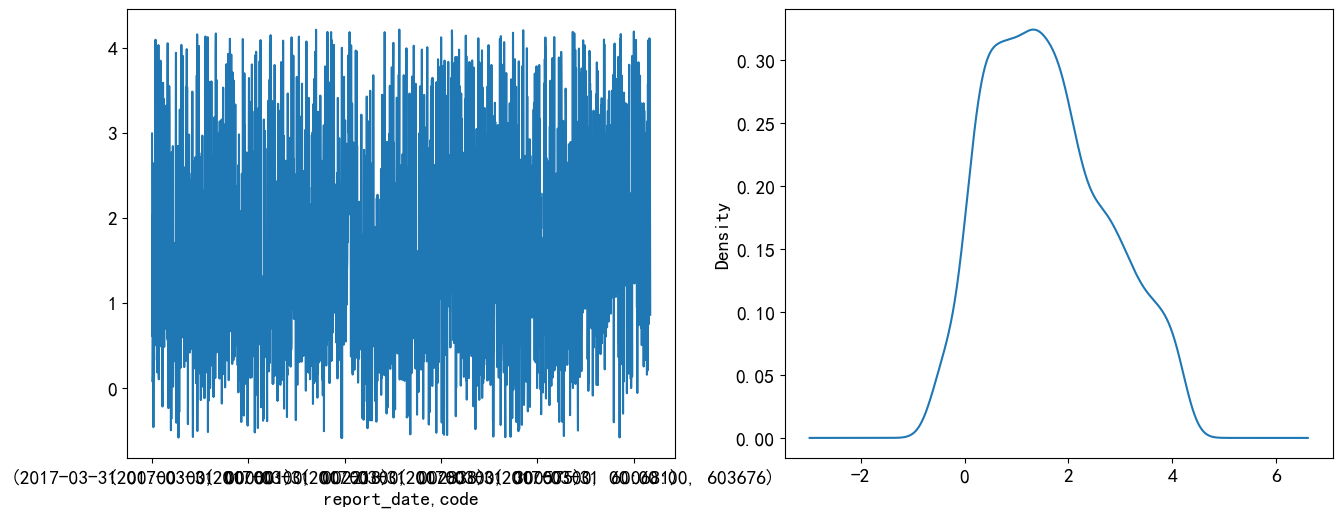

In [3]:
fig = plt.figure(figsize=(1120/72,420/72))
finances_filted['ROE'].plot(ax=fig.add_subplot(1,2,1))
# plt.scatter(finances_filted['ROE'].index.get_level_values('code'),finances_filted['ROE'].values)
finances_filted['ROE'].plot(kind="kde",ax=fig.add_subplot(1,2,2))
# finances_filted['ROE'].describe()
# finances_filted['totalAssets'].mean()
# plt.show()

{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5, 'breadth_first': True, 'kernel': 'epanechnikov', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0}


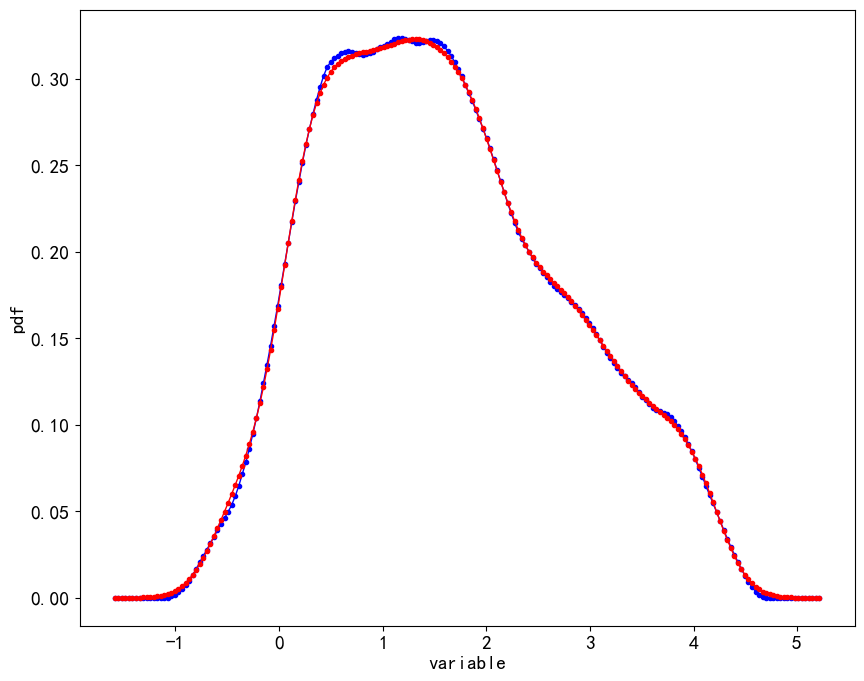

In [9]:
X_plot = np.linspace((finances_filted['ROE']).min()-1, (finances_filted['ROE']).max()+1, 200)[:, np.newaxis]
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit((finances_filted['ROE']).values.reshape(-1, 1))  
log_dens = kde.score_samples(X_plot)  # 返回的是点x对应概率密度的log值，需要使用exp求指数还原
print(kde.get_params())
plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(X_plot, np.exp(log_dens), marker='.', linewidth=1, c="b", label='kernel density')
plt.xlabel('variable')
plt.ylabel('pdf')

kde = KernelDensity(kernel='gaussian', bandwidth=0.25).fit((finances_filted['ROE']).values.reshape(-1, 1))  
log_dens = kde.score_samples(X_plot)
# # kde = KernelDensity(kernel='epanechnikov', bandwidth=1).fit(((finances_filted['ROE']-finances_filted['ROE'].mean())/finances_filted['ROE'].std()).values.reshape(-1, 1))  # 高斯核密度估计
plt.plot(X_plot, np.exp(log_dens), marker='.', linewidth=1, c="r", label='kernel density')


plt.show()


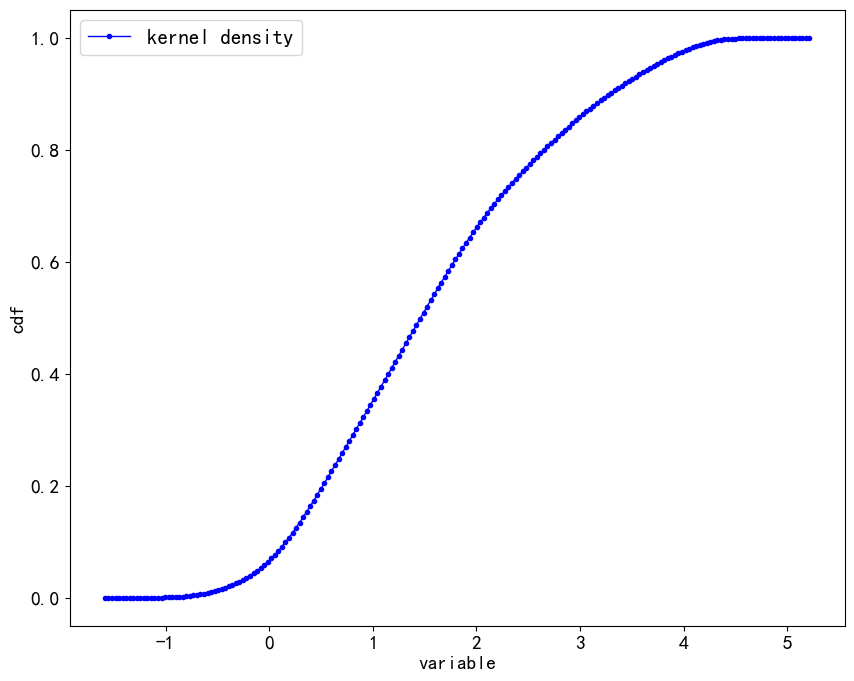

In [10]:
plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(X_plot, np.cumsum(np.exp(log_dens)*np.abs(X_plot[0]-X_plot[1])), marker='.', linewidth=1, c="b", label='kernel density')
plt.xlabel('variable')
plt.ylabel('cdf') 
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

In [15]:
np.exp( kde.score_samples(np.array([1.3,1.3]).reshape(-1,1)))

array([0.3208685, 0.3208685])

In [16]:
np.exp(kde.score(np.array([1.3,1.3]).reshape(-1,1)))

0.10295659384991993